In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
import analyze_utils

save_dir = '/home/jxm3/research/prompting/interpretable-autoprompting/results_icml/ablation2_rerun'

r, all_losses = analyze_utils.load_results_and_cache_autoprompt_json(
    save_dir, save_file='r.pkl', do_reranking=True, include_losses=True
)

getting dir_names...


  0%|                                                                                                                 | 0/480 [00:00<?, ?it/s]


NameError: name '_rerank_df' is not defined

In [119]:
len(r)

173873

In [140]:
top_prompts = (
    r.groupby(['task_name', 'n_shots', 'iprompt_conditioning_strategy', 'single_shot_loss', 'seed'])
).first().reset_index()
print(len(top_prompts))
top_prompts['r@128'] = top_prompts['reciprocal_rank'].map(lambda r: (1.0/r) <128.1)
# top_prompts[['task_name', 'seed', 'max_digit', 'prefixes', 'reciprocal_rank']]

480


In [124]:
MATH_TASK_NAMES = {
    'add_two', 'multiply_two', 'subtract_two', 'max_two', 
    'first_two', 'square_one', 'double_one', 'exp_one',  
    'fibonacci_one', 'divide_two'
}
TASK_IS_MATH = top_prompts['task_name'].map(lambda t: t in MATH_TASK_NAMES)
TASK_IS_ANLI = top_prompts['task_name'].map(lambda t: t not in MATH_TASK_NAMES)

In [141]:
pd.set_option('display.max_rows', None)
# top_prompts[(top_prompts['single_shot_loss'] == 1) & (top_prompts['iprompt_conditioning_strategy'] == "")].sort_values(by='task_name')[['n_shots', 'task_name', 'prefixes', 'reciprocal_rank']]

In [ ]:
top_prompts[TASK_IS_MATH].groupby(['n_shots', 'single_shot_loss', 'iprompt_conditioning_strategy']).count()['reciprocal_rank']

n_shots  single_shot_loss  iprompt_conditioning_strategy
1        1                                                  40
5        0                                                  40
         1                                                  40
                           unconditional                    40
                           x_only                           40
                           y_only                           40
Name: reciprocal_rank, dtype: int64

In [143]:
top_prompts[TASK_IS_MATH].groupby(['n_shots', 'single_shot_loss', 'iprompt_conditioning_strategy']).mean()['r@128']

n_shots  single_shot_loss  iprompt_conditioning_strategy
1        1                                                  0.975
5        0                                                  0.500
         1                                                  0.900
                           unconditional                    0.600
                           x_only                           0.700
                           y_only                           0.725
Name: r@128, dtype: float64

In [145]:
top_prompts[TASK_IS_ANLI].groupby(['n_shots', 'single_shot_loss', 'iprompt_conditioning_strategy']).mean()['r@128']

n_shots  single_shot_loss  iprompt_conditioning_strategy
1        1                                                  0.550
5        0                                                  0.550
         1                                                  0.600
                           unconditional                    0.050
                           x_only                           0.450
                           y_only                           0.475
Name: r@128, dtype: float64

In [146]:
top_prompts[TASK_IS_MATH].groupby(['n_shots', 'single_shot_loss', 'iprompt_conditioning_strategy']).mean()['r@128']

n_shots  single_shot_loss  iprompt_conditioning_strategy
1        1                                                  0.975
5        0                                                  0.500
         1                                                  0.900
                           unconditional                    0.600
                           x_only                           0.700
                           y_only                           0.725
Name: r@128, dtype: float64

In [137]:
top_prompts[TASK_IS_ANLI].groupby(['n_shots', 'single_shot_loss', 'iprompt_conditioning_strategy']).mean()['reciprocal_rank']

n_shots  single_shot_loss  iprompt_conditioning_strategy
1        1                                                  0.328980
5        0                                                  0.305123
         1                                                  0.276434
                           unconditional                    0.003238
                           x_only                           0.163259
                           y_only                           0.189492
Name: reciprocal_rank, dtype: float64

In [129]:
top_prompts.groupby(['n_shots', 'single_shot_loss', 'iprompt_conditioning_strategy']).mean()['reciprocal_rank']

n_shots  single_shot_loss  iprompt_conditioning_strategy
1        1                                                  0.442559
5        0                                                  0.182723
         1                                                  0.226346
                           unconditional                    0.073851
                           x_only                           0.172780
                           y_only                           0.163544
Name: reciprocal_rank, dtype: float64

In [68]:
d1['prefix_train_acc']

0.0

In [67]:
d1 = dict(top_prompts[
      (top_prompts['iprompt_conditioning_strategy'] == "") 
    & (top_prompts['single_shot_loss'] == 1)
].iloc[0])
d2 = {'task_name': 'add_two',  'seed': 6,  'checkpoint': 'EleutherAI/gpt-j-6B',  'iprompt_generation_checkpoint': 'EleutherAI/gpt-j-6B',  'model_cls': 'iprompt',  'batch_size': 16,  'n_epochs': 100,  'max_n_steps': 10000000000,  'max_n_datapoints': 5000,  'train_split_frac': 1.0,  'max_dset_size': 5000,  'early_stopping_steps': 50,  'max_digit': 10,  'template_num_init_string': 0,  'template_num_task_phrasing': 0,  'save_dir': '/home/jxm3/research/prompting/interpretable-autoprompting/results_icml/ablation3',  'epoch_save_interval': 1,  'lr': 0.0001,  'gamma': 0.0,  'n_shots': 5,  'autoprompt_init_strategy': 'the',  'max_length': 64,  'single_shot_loss': 1,  'mask_possible_answers': 0,  'hotflip_num_candidates': 10,  'accum_grad_over_epoch': 0,  'num_learned_tokens': 6,  'use_preprefix': 0,  'iprompt_preprefix_str': '',  'iprompt_pop_size': 4,  'iprompt_num_mutations': 2,  'iprompt_generation_repetition_penalty': 2.0,  'iprompt_generation_temp': 1.0,  'iprompt_generation_top_p': 1.0,  'iprompt_conditioning_strategy': '',  'iprompt_num_random_generations': 4,  'llm_float16': 1,  'use_generic_query': 0,  'train_start_time': 1674202498.5770762,  'prefix_ids': (705, 7061, 10, 15414, 22510, 16),  'prefixes': " '''+inputnum1",  'prefix_train_acc': 0.0,  'prefix_train_loss': 9.009683609008789,  'prefix_n_queries': 3,  'topk_pop_sample': 8,  'pop_size': 4,  'num_mutations_per_ex': 2,  'num_random_generations': 4,  'generation_temp': 1.0,  'generation_top_p': 1.0,  'generation_repetition_penalty': 2.0,  'generation_bad_words_ids': '198',  'pre_data_prompt_str': 'Data:\n\n',  'post_data_prompt_str': '\n\nPrompt:',  'prefixes__check_answer_func': True,  'train_end_time': 1674203377.112308,  'train_time_elapsed': 878.5352318286896,  'pickle_filename': '/home/jxm3/research/prompting/interpretable-autoprompting/results_icml/ablation3/Jan_20_03_14_ckjgfykqjqpb/results.pkl',  'final_answer_pos_initial_token': 0,  'reciprocal_rank': 1.0,  'iprompt_do_final_reranking': 1.0,  'iprompt_criterion': 'loss'}

d3 = {k: [v, d2[k]] for k,v in d1.items() if v != d2[k]}
d3

{'seed': [1, 6],
 'save_dir': ['/home/jxm3/research/prompting/interpretable-autoprompting/results_icml/ablation2',
  '/home/jxm3/research/prompting/interpretable-autoprompting/results_icml/ablation3'],
 'iprompt_generation_checkpoint': [None, 'EleutherAI/gpt-j-6B'],
 'train_start_time': [1674124353.4011478, 1674202498.5770762],
 'prefix_ids': [(19430, 257, 2163, 284, 751, 734),
  (705, 7061, 10, 15414, 22510, 16)],
 'prefixes': [' Write a function to add two', " '''+inputnum1"],
 'prefix_train_loss': [7.275566101074219, 9.009683609008789],
 'prefix_n_queries': [25, 3],
 'train_end_time': [1674125195.2376258, 1674203377.112308],
 'train_time_elapsed': [841.8364779949188, 878.5352318286896],
 'pickle_filename': ['/home/jxm3/research/prompting/interpretable-autoprompting/results_icml/ablation2/Jan_19_05_32_yrafjcztehvc/results.pkl',
  '/home/jxm3/research/prompting/interpretable-autoprompting/results_icml/ablation3/Jan_20_03_14_ckjgfykqjqpb/results.pkl']}

In [199]:
top_prompts.groupby('task_name').mean().reset_index().sort_values(by='reciprocal_rank')[['task_name', 'reciprocal_rank']]

,task_name,reciprocal_rank
16,task1191_food_veg_nonveg,0.002245
17,task1336_peixian_equity_evaluation_corpus_gend...,0.005047
15,task1149_item_check_edible,0.006944
11,task092_check_prime_classification,0.010181
1,divide_two,0.024289
10,task088_identify_typo_verification,0.024428
4,fibonacci_one,0.032168
3,exp_one,0.041617
5,first_two,0.127542
6,max_two,0.127545


In [ ]:
top_prompts_df[top_prompts_df['reciprocal_rank'] < 0.1][['prefixes','reciprocal_rank','task_name']]

## plot losses as lines.

In [149]:
len(all_losses), len(top_prompts)

(480, 480)

In [182]:
import numpy as np
max_loss_len = max([len(L) for L in all_losses])

all_losses_padded = []
for L in all_losses:
    last_val = L[-1]
    all_losses_padded.append(
        L + [last_val] * (max_loss_len - len(L))
    )
all_losses_padded = np.array(all_losses_padded)

In [183]:
(top_prompts['reciprocal_rank'] > 0.5).sum()

77

In [184]:
len(all_losses_padded[GOOD_RUNS].mean(axis=0))

350

In [185]:
GOOD_RUNS.mean()

0.16041666666666668

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019)]

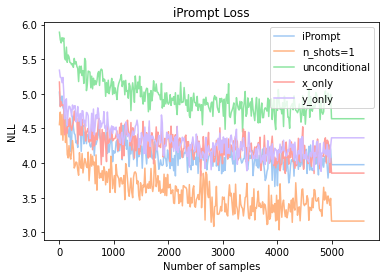

In [205]:
import matplotlib.pyplot as plt

COLORS = sns.color_palette("pastel", 6)

#############################################

DEFAULT = (
    (top_prompts['n_shots'] == 5) & (top_prompts['iprompt_conditioning_strategy'] == "") & (top_prompts["single_shot_loss"] == 1)
)
NSHOTS_1 = (
    top_prompts['n_shots'] == 1
)
COND_UNCONDITIONAL = (
    top_prompts['iprompt_conditioning_strategy'] == 'unconditional'
)
COND_XONLY = (
    top_prompts['iprompt_conditioning_strategy'] == 'x_only'
)
COND_YONLY = (
    top_prompts['iprompt_conditioning_strategy'] == 'y_only'
)

BATCH_SIZE = top_prompts['batch_size'].unique()[0]
X_AXIS = np.arange(all_losses_padded.shape[1]) * BATCH_SIZE

#############################################

for MASK, LABEL, COLOR in zip(
        [DEFAULT, NSHOTS_1, COND_UNCONDITIONAL, COND_XONLY, COND_YONLY], 
        ['iPrompt', 'n_shots=1', 'unconditional', 'x_only', 'y_only'],
        COLORS
    ):
    plt.plot(X_AXIS, all_losses_padded[MASK & TASK_IS_MATH & (top_prompts['reciprocal_rank'] < 0.2)].mean(axis=0), color=COLOR, label=LABEL)

#############################################

plt.title('iPrompt Loss')
plt.xlabel('Number of samples')
plt.ylabel('NLL')
plt.legend()

In [221]:
def label_exp(r): 
    if (r['n_shots'] == 5) & (r['iprompt_conditioning_strategy'] == "") & (r["single_shot_loss"] == 1):
        return 'Default'
    elif r['n_shots'] == 1:
        return 'Zero-shot generation'
    elif r['iprompt_conditioning_strategy'] == 'unconditional':
        return 'Unconditional generation'
    elif r['single_shot_loss'] == 0:
        return 'No single-shot loss'
    elif r['iprompt_conditioning_strategy'] == 'x_only':
        return 'x-conditioned generation'
    elif r['iprompt_conditioning_strategy'] == 'y_only':
        return 'y-conditioned generation'
    else:
        print(r)
        raise ValueError('unknown exp for row')
    
# r['exp'] = r.apply(label_exp, axis=1)
top_prompts['exp'] = top_prompts.apply(label_exp, axis=1)
top_prompts['exp'].value_counts()

Zero-shot generation        80
No single-shot loss         80
Default                     80
Unconditional generation    80
x-conditioned generation    80
y-conditioned generation    80
Name: exp, dtype: int64

<AxesSubplot:xlabel='reciprocal_rank', ylabel='task_name'>

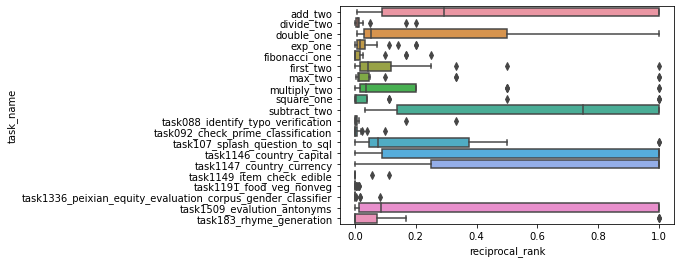

In [212]:
sns.boxplot(data=top_prompts, x="reciprocal_rank", y="task_name")

<AxesSubplot:xlabel='prefix_train_acc', ylabel='exp'>

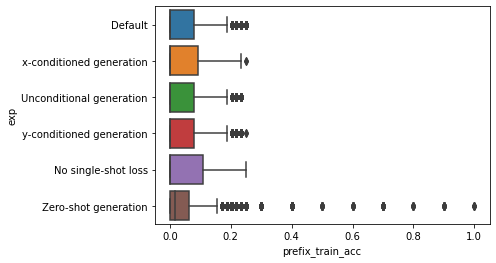

In [223]:
sns.boxplot(data=r, x="prefix_train_acc", y="exp")